In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
import random as r

# MODELO SIR BÁSICO

In [13]:
N = 5000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.015 # infection probability in a zombie-human encounter
alpha = 0.03 # removal probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano; est = 1 zombie; est = 2 zombie muerto

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

it = 400
nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nR = np.zeros(it, dtype = int)
suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nR[t] = len(np.where(est1 == 2)[0])
    
    ##### INFECTION #####
    # Identificamos los zombies en la red y las infecciones que producen
    
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie


    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    
    zombies_removal = np.where(est == 1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    est = est1
    suma[t] = nH[t] + nZ[t] + nR[t]
    

192


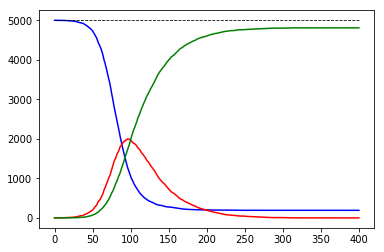

In [15]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nR, color = 'green')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)
print(nH[-1])

In [16]:
def remove_deadz(net,est1,N):
    # Eliminamos los nodos con estado = 2 (removed)
    net2 = net.copy()
    for i in range(0,N):
        if est1[i] == 2:
            net2.remove_node(i)
    return net2

def adjacency_survivors(adj2, est1, N):
    # Hacemos una nueva matriz de adyacencia en la que eliminar los links de los nodos removed
    adj3 = adj2.copy()
    adj3 = adj3.todense()
    for i in range(0,N):
        if est1[i] == 2 or est1[i] == 3: #si el nodo está removed, hay que eliminar sus links
            links = np.where(adj3[i,:] !=0. )[1]
            for l in links:
                adj3[i,l] = 0.
                adj3[l,i] = 0.
    return adj3

net2 = remove_deadz(net,est1,N)
adj2 = adjacency_survivors(adj, est1, N)
pos = nx.fruchterman_reingold_layout(net2)
# asignamos colores a los nodos que tienen estado = 0 (humanos), estado = 1 (zombies)
color_list = []
for i in range(0,N):
    if est1[i] == 0:
        color_list.append('blue')
    elif est1[i] == 1:
        color_list.append('red')


In [21]:
net2.number_of_nodes()

192

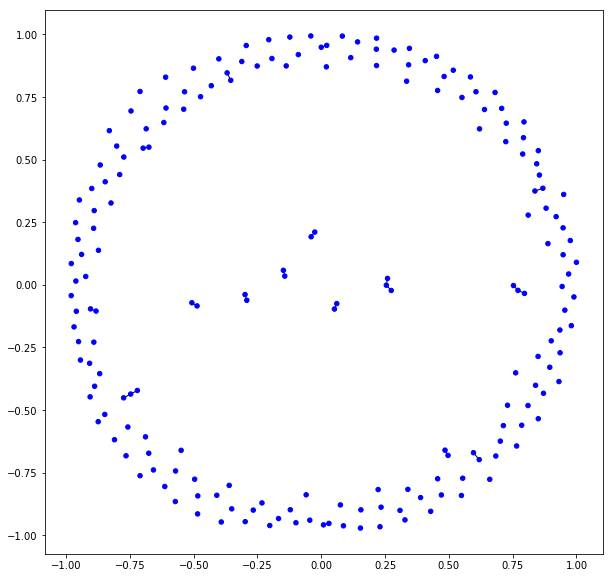

In [23]:
plt.figure(figsize=(10,10))
nx.draw_networkx(net2, with_labels = False, pos = pos, node_color = color_list, 
        node_size = 20)
#plt.axis([-0.25,0.25,-0.25,0.25])
plt.show()

In [22]:
deg_random = nx.degree(net2) #grado de cada nodo
k = np.zeros(N)
hums = np.where(est1 == 0)[0]
for i in range(0, np.size(hums)):
    k[i] = nx.degree(net2, nbunch = hums[i])
print('grado medio de la red=', sum(k)/len(k))


grado medio de la red= 0.0076


# MODELO SIR + delta constante

In [158]:
N = 35000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.04 # infection probability in a zombie-human encounter
alpha = 0.08 # zombie removal probability
delta = 0.005 # human removal probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano; est = 1 zombie; est = 2 zombie muerto; est = 3 humano muerto

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

it = 300
nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    
    ##### INFECTION #####
    # Identificamos los zombies en la red y las infecciones que producen
    
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie


    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN REMOVAL #####
    human_removal = np.where(est1==0)[0] # buscamos los humanos que quedan 
    for i in range(0, len(human_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_removal[i]] = 3 
    
    
    
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t]
    

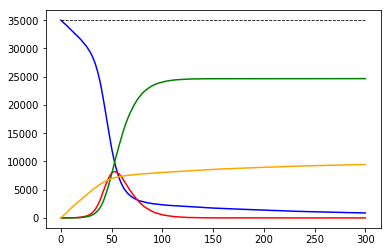

In [159]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

# MODELO SIR + delta + militares

In [10]:
N = 10000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.07 # infection probability in a zombie-human encounter
alpha = 0.05 # zombie removal probability
delta = 0.003 # human removal probability

mu = 0.05 # millitar probability
eta = 0.02 # human turns into millitar probability
factor = 0.5 # millitary beta reduction
gamma = 0.1 

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano; est = 1 zombie; est = 2 zombie muerto; est = 3 humano muerto; est = 4 militar

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

it = 300

nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
nM = np.zeros(it, dtype = int)

suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    nM[t] = len(np.where(est1 == 4)[0])
    
    ##### INFECTION PARA MILITARES #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relm = rel[est[rel]==4] # nodos militares conectados con z

        for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta*factor: # the node is infected
                est1[relm[j]] = 1 # militar turns into zombie
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
            
    ##### INFECTION PARA HUMANOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie
            else: # humano sobrevive al encuentro con el zombie
                if r.uniform(0,1) < mu:
                    est1[relh[j]] = 4
            
                    
    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN/MILLITAR REMOVAL #####
    human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],np.where(est1 == 4)[0]), axis = None)) # buscamos los humanos y militares que quedan 
    for i in range(0, len(human_mil_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_mil_removal[i]] = 3 
    
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.where(est == 4)[0]
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relh = rel[est[rel]==0] # nodos humanos conectados con m

        for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relh[j]] = 4 # human turns into millitary
  
    
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t]


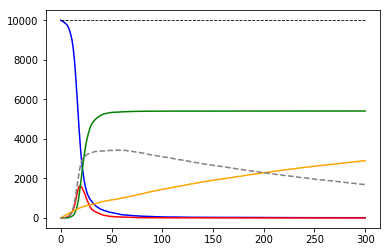

In [11]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), nM, '--', color = 'grey')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

In [225]:
N = 10000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.1 # infection probability in a zombie-human encounter
alpha = 0.001 # zombie removal probability
delta = 0.002 # human removal probability

mu = 0.01 # becoming a millitary probability
eta = 0.05 # human turns into millitary probability
factor = 0.5 
gamma = 0.5 # millitary killing a zombie probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano; est = 1 zombie; est = 2 zombie muerto; est = 3 humano muerto; est = 4 militar

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

it = 300

nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
nM = np.zeros(it, dtype = int)

suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    nM[t] = len(np.where(est1 == 4)[0])
    
    ##### INFECTION PARA MILITARES #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relm = rel[est[rel]==4] # nodos militares conectados con z

        for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta*factor: # the node is infected
                est1[relm[j]] = 1 # militar turns into zombie
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
            
    ##### INFECTION PARA HUMANOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie
            else: # humano sobrevive al encuentro con el zombie
                if r.uniform(0,1) < mu:
                    est1[relh[j]] = 4
            
                    
    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN/MILLITAR REMOVAL #####
    human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],np.where(est1 == 4)[0]), axis = None)) # buscamos los humanos y militares que quedan 
    for i in range(0, len(human_mil_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_mil_removal[i]] = 3 
    
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.where(est == 4)[0]
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relh = rel[est[rel]==0] # nodos humanos conectados con m

        for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relh[j]] = 4 # human turns into millitary
  
    
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t]


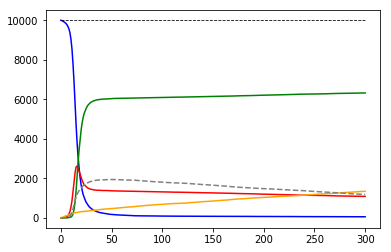

In [226]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), nM, '--', color = 'grey')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

In [273]:
N = 1000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.1 # infection probability in a zombie-human encounter
alpha = 0.001 # zombie removal probability
delta = 0.002 # human removal probability

mu = 0.01 # becoming a millitary probability
eta = 0.05 # human turns into millitary probability
factor = 0.5 
gamma = 0.5 # millitary killing a zombie probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano; est = 1 zombie; est = 2 zombie muerto; est = 3 humano muerto; est = 4 militar

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

it = 300

nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
nM = np.zeros(it, dtype = int)

suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    nM[t] = len(np.where(est1 == 4)[0])
    
    ##### INFECTION PARA MILITARES #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relm = rel[est[rel]==4] # nodos militares conectados con z

        for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta*factor: # the node is infected
                est1[relm[j]] = 1 # militar turns into zombie
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
            
    ##### INFECTION PARA HUMANOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie
            else: # humano sobrevive al encuentro con el zombie
                if r.uniform(0,1) < mu:
                    est1[relh[j]] = 4
            
                    
    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN/MILLITAR REMOVAL #####
    human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],np.where(est1 == 4)[0]), axis = None)) # buscamos los humanos y militares que quedan 
    for i in range(0, len(human_mil_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_mil_removal[i]] = 3 
    
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.where(est == 4)[0]
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relh = rel[est[rel]==0] # nodos humanos conectados con m

        for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relh[j]] = 4 # human turns into millitary
  
    
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t]


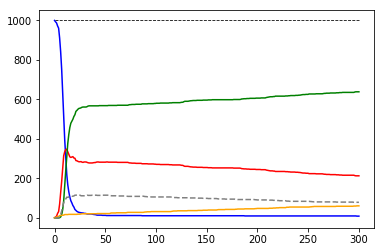

In [274]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), nM, '--', color = 'grey')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

In [281]:
net2 = net.copy()
for i in range(0,N):
    if est1[i] == 2 or est1[i] == 3:
        net2.remove_node(i)        

In [287]:
color_list = []
for i in range(0,N):
    if est1[i] == 0:
        color_list.append('blue')
    elif est1[i] == 1:
        color_list.append('red')
    elif est1[i] == 4:
        color_list.append('green')

In [1]:
plt.figure(figsize=(20,10))

nx.draw_networkx(net2, with_labels = False, node_color = color_list, node_size = 20, alpha = 0.9, edge_color = 'darkgray')
plt.show()

NameError: name 'plt' is not defined

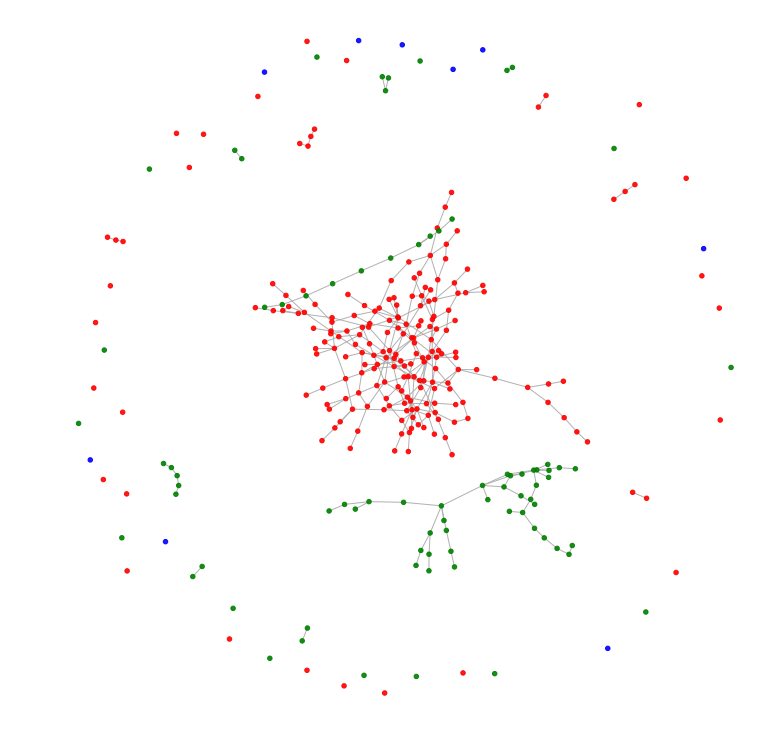

In [302]:
plt.figure(figsize=(10,10))

nx.draw(net2, with_labels = False, node_color = color_list, node_size = 20, alpha = 0.9, edge_color = 'darkgray')
plt.show()

# MODELO SIR + delta + MILITARES + fracción in inmunizada

In [337]:
N = 1000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.1 # infection probability in a zombie-human encounter
alpha = 0.001 # zombie removal probability
delta = 0.002 # human removal probability

mu = 0.01 # becoming a millitary probability
eta = 0.05 # human turns into millitary probability
factor = 0.5 
gamma = 0.5 # millitary killing a zombie probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano
# est = 1 zombie
# est = 2 zombie muerto
# est = 3 humano muerto
# est = 4 militar
# est = 5 humano inmunizado
# est = 6 militar inmunizado

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

# fracción de inmunizados ante la propagación del virus
frac0inm = 0.1
inm_initial = frac0inm*N
cont = 0
while cont < inm_initial:
    nodo = r.randint(0,N-1)
    if est1[nodo] == 0:
        est1[nodo] = 5
        est[nodo] = 5
        cont = cont + 1


it = 300

nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
nM = np.zeros(it, dtype = int)
nMI = np.zeros(it, dtype = int)
nHI = np.zeros(it, dtype = int)

suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    nM[t] = len(np.where(est1 == 4)[0])
    nHI[t] = len(np.where(est1 == 5)[0])
    nMI[t] = len(np.where(est1 == 6)[0])
    
    ##### INFECTION PARA MILITARES #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relm = rel[est[rel] == 4] # nodos militares conectados con z

        for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta*factor: # the node is infected
                est1[relm[j]] = 1 # militar turns into zombie
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
    ##### MILITARES INMUNIZADOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relmi = rel[est[rel] == 6] # nodos militares conectados con z

        for j in range(0, len(relmi)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
                
    ##### INFECTION PARA HUMANOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie
            else: # humano sobrevive al encuentro con el zombie
                if r.uniform(0,1) < mu:
                    est1[relh[j]] = 4
            
                    
    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN/MILLITAR REMOVAL #####
    human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],np.where(est1 == 4)[0],np.where(est1 == 5)[0],np.where(est1 == 6)[0]), axis = None)) # buscamos los humanos y militares que quedan 
    for i in range(0, len(human_mil_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_mil_removal[i]] = 3 
    
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.sort(np.concatenate((np.where(est1 == 4)[0],np.where(est1 == 6)[0])))
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relh = rel[est[rel]==0] # nodos humanos conectados con m

        for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relh[j]] = 4 # human turns into millitary
  
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.sort(np.concatenate((np.where(est1 == 4)[0],np.where(est1 == 6)[0])))
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relhi = rel[est[rel]==5] # nodos humanos inmunizados conectados con m

        for j in range(0, len(relhi)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relhi[j]] = 6 # human turns into millitary
                
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t] + nMI[t] + nHI[t]


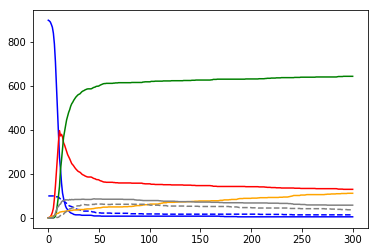

In [338]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nHI, '--', color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), nM, color = 'grey')
plt.plot( np.linspace(0,it,it), nMI, '--', color = 'grey')

# MODELO SIR + delta + MILITARES + inmunización

In [ ]:
N = 1000
kav = 10
p = kav/(N-1)

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.1 # infection probability in a zombie-human encounter
alpha = 0.001 # zombie removal probability
delta = 0.002 # human removal probability

mu = 0.01 # becoming a millitary probability
eta = 0.05 # human turns into millitary probability
factor = 0.5 
gamma = 0.5 # millitary killing a zombie probability

# "est" es un vector que guarda el estado de cada nodo de la red
#  est = 0 humano
# est = 1 zombie
# est = 2 zombie muerto
# est = 3 humano muerto
# est = 4 militar
# est = 5 humano inmunizado
# est = 6 militar inmunizado

est = np.zeros(N, dtype = int)
est1 = np.zeros(N, dtype = int)

# paciente zero: el primer infectado por el virus
pac0 = r.randint(0,N)
est[pac0] = 1
est1[pac0] = 1

# fracción de inmunizados ante la propagación del virus
frac0inm = 0.1
inm_initial = frac0inm*N
cont = 0
while cont < inm_initial:
    nodo = r.randint(0,N-1)
    if est1[nodo] == 0:
        est1[nodo] = 5
        est[nodo] = 5
        cont = cont + 1


it = 300

nH = np.zeros(it, dtype = int)
nZ = np.zeros(it, dtype = int)
nRZ = np.zeros(it, dtype = int)
nRH = np.zeros(it, dtype = int)
nM = np.zeros(it, dtype = int)
nMI = np.zeros(it, dtype = int)
nHI = np.zeros(it, dtype = int)

suma = np.zeros(it, dtype = int)

for t in range(0, it): # time

    ##### RECUENTO #####
    nH[t] = len(np.where(est1 == 0)[0])
    nZ[t] = len(np.where(est1 == 1)[0])
    nRZ[t] = len(np.where(est1 == 2)[0])
    nRH[t] = len(np.where(est1 == 3)[0])
    nM[t] = len(np.where(est1 == 4)[0])
    nHI[t] = len(np.where(est1 == 5)[0])
    nMI[t] = len(np.where(est1 == 6)[0])
    
    ##### INFECTION PARA MILITARES #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relm = rel[est[rel] == 4] # nodos militares conectados con z

        for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta*factor: # the node is infected
                est1[relm[j]] = 1 # militar turns into zombie
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
    ##### MILITARES INMUNIZADOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relmi = rel[est[rel] == 6] # nodos militares conectados con z

        for j in range(0, len(relmi)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
            if r.uniform(0,1) < gamma:
                est1[z] = 2
                
                
    ##### INFECTION PARA HUMANOS #####
    
    # Identificamos los zombies en la red y las infecciones que producen
    zombies = np.where(est == 1)[0]
    
    for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie
        
        z = zombies[i] # nodo z es un zombie
        rel = adj[z,:].indices # nodos que están conectados con z
        relh = rel[est[rel]==0] # nodos humanos conectados con z

        for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
            if r.uniform(0, 1) < beta: # the node is infected
                est1[relh[j]] = 1 # human turns into zombie
            else: # humano sobrevive al encuentro con el zombie
                if r.uniform(0,1) < mu:
                    est1[relh[j]] = 4
            
                    
    ##### ZOMBIE REMOVAL #####
    # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
    zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
    for i in range(0, len(zombies_removal)):
        if r.uniform(0, 1) < alpha:
            est1[zombies_removal[i]] = 2 
    
    ##### HUMAN/MILLITAR REMOVAL #####
    human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],np.where(est1 == 4)[0],np.where(est1 == 5)[0],np.where(est1 == 6)[0]), axis = None)) # buscamos los humanos y militares que quedan 
    for i in range(0, len(human_mil_removal)):
        if r.uniform(0, 1) < delta:
            est1[human_mil_removal[i]] = 3 
    
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.sort(np.concatenate((np.where(est1 == 4)[0],np.where(est1 == 6)[0])))
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relh = rel[est[rel]==0] # nodos humanos conectados con m

        for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relh[j]] = 4 # human turns into millitary
  
    #### HUMAN - MILLITAR ENCOUNTER ####
    # Identificamos los militares en la red y los humanos con los que están conectados
    mills = np.sort(np.concatenate((np.where(est1 == 4)[0],np.where(est1 == 6)[0])))
    
    for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie
        
        m = mills[i] # nodo z es un zombie
        rel = adj[m,:].indices # nodos que están conectados con m
        relhi = rel[est[rel]==5] # nodos humanos inmunizados conectados con m

        for j in range(0, len(relhi)): # para cada nodo humano conectado con un militar
            if r.uniform(0, 1) < eta: # the node is transformed
                est1[relhi[j]] = 6 # human turns into millitary
                
    est = est1
    suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t] + nMI[t] + nHI[t]
